# Мною был выбран вариант подарка ПРОМОКОДА для пользователей, нажавших отмену поездки! Ожидаем снижение отмен.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats 
import matplotlib.pyplot as plt

In [3]:
post = pd.read_csv('post_abtest_data.csv')
post = post[post['os'] == 'Android'] 
# оставляем только пользователей андроид

In [4]:
post.date.unique() # выясняем, какие даты есть

array(['2020-05-28', '2020-05-25', '2020-05-29', '2020-05-30',
       '2020-05-31', '2020-05-27', '2020-05-26'], dtype=object)

In [49]:
# ниже идёт разделение датасета на 7 частей. Для выборки взял по 2 тыс. для равенства контрольно-тестовых групп.

In [50]:
day0control = post[(post.date == '2020-05-25') & (post.group == 'Control')]['user_cancelled'].dropna().sample(n=2000)
day0test = post[(post.date == '2020-05-25') & (post.group == 'Test')]['user_cancelled'].dropna().sample(n=2000)

In [51]:
day1test = post[(post.date == '2020-05-26') & (post.group == 'Test')]['user_cancelled'].dropna().sample(n=2000)
day1control = post[(post.date == '2020-05-26') & (post.group == 'Control')]['user_cancelled'].dropna().sample(n=2000)

In [52]:
day2test = post[(post.date == '2020-05-27') & (post.group == 'Test')]['user_cancelled'].dropna().sample(n=2000)
day2control = post[(post.date == '2020-05-27') & (post.group == 'Control')]['user_cancelled'].dropna().sample(n=2000)

In [53]:
day3test = post[(post.date == '2020-05-28') & (post.group == 'Test')]['user_cancelled'].dropna().sample(n=2000)
day3control = post[(post.date == '2020-05-28') & (post.group == 'Control')]['user_cancelled'].dropna().sample(n=2000)

In [54]:
day4test = post[(post.date == '2020-05-29') & (post.group == 'Test')]['user_cancelled'].dropna().sample(n=2000)
day4control = post[(post.date == '2020-05-29') & (post.group == 'Control')]['user_cancelled'].dropna().sample(n=2000)

In [55]:
day5test = post[(post.date == '2020-05-30') & (post.group == 'Test')]['user_cancelled'].dropna().sample(n=2000)
day5control = post[(post.date == '2020-05-30') & (post.group == 'Control')]['user_cancelled'].dropna().sample(n=2000)

In [56]:
day6test = post[(post.date == '2020-05-31') & (post.group == 'Test')]['user_cancelled'].dropna().sample(n=2000)
day6control = post[(post.date == '2020-05-31') & (post.group == 'Control')]['user_cancelled'].dropna().sample(n=2000)

In [57]:
test = [day0test,day1test,day2test,day3test,day4test,day5test,day6test] # заводим списки для удобства перебирания в цикле

In [58]:
len(day0test)

2000

In [59]:
control = [day0control,day1control,day2control,day3control,day4control,day5control,day6control]

In [60]:
Pv = []
for i in range(7):
    T, p = stats.ttest_ind(control[i], test[i])
    Pv.append(p)

In [61]:
Pv # получаем пи-вэлью по дням

[0.3972116807905236,
 0.001845025818854861,
 2.578961379188249e-07,
 3.5791093290404e-05,
 9.867171056470757e-07,
 0.00011664153821938427,
 0.0006318483994373009]

<BarContainer object of 7 artists>

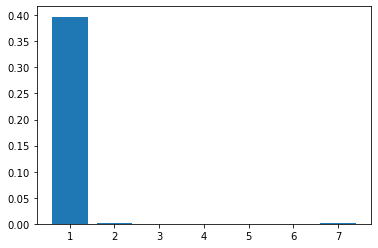

In [62]:
plt.bar(range(1,8), Pv)
# p-value of day

<BarContainer object of 7 artists>

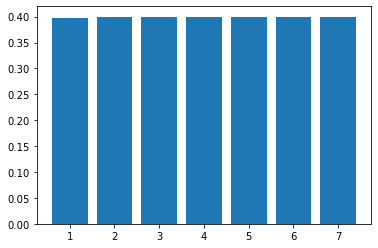

In [63]:
plt.bar(range(1,8), np.cumsum(Pv))
# кумулятивный p-value практически не накапливается))

# p-value очень мал (кроме первого дня), так что вероятность получить экстремальные значения будь выборки из одной совокупности практически нереальны.

In [64]:
post_ctrl = post[(post['group'] == 'Control') & (post['os'] == 'Android')]['user_cancelled'].dropna().sample(n=20000).value_counts()
post_ctrl

0.0    16298
1.0     3702
Name: user_cancelled, dtype: int64

In [65]:
post_test = post[(post['group'] == 'Test') & (post['os'] == 'Android')]['user_cancelled'].dropna().sample(n=20000).value_counts()
post_test

0.0    17106
1.0     2894
Name: user_cancelled, dtype: int64

# Разница ощутима - в тестовой группе гораздо меньше "единиц", а значит и отмен поездок. Наша фича сработала!